In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

In [17]:
df=pd.read_csv(r"C:\Users\Kyle\Desktop\Middlesex uni\Machine Learning\Week8\house_data.csv")
df

,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail,Price
0,5.565,70.6,2.0635,24,666,17.16,8.79212,0.584,20.2,0.0,18.10,11.7
1,6.879,77.7,3.2721,8,307,9.93,0.62356,0.507,17.4,0.0,6.20,27.5
2,5.972,76.7,3.1025,4,304,9.97,0.34940,0.544,18.4,0.0,9.90,20.3
3,6.943,97.4,1.8773,5,403,4.59,1.22358,0.605,14.7,0.0,19.58,41.3
4,5.926,71.0,2.9084,24,666,18.13,15.57570,0.580,20.2,0.0,18.10,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...
394,6.019,65.3,2.4091,6,391,12.92,0.23912,0.585,19.2,0.0,9.69,21.2
395,5.936,80.3,2.7792,24,666,16.94,8.20058,0.713,20.2,0.0,18.10,13.5
396,6.590,40.4,5.4917,7,329,9.50,0.03537,0.433,16.1,34.0,6.09,22.0
397,6.405,85.4,2.7147,5,384,10.63,0.22876,0.520,20.9,0.0,8.56,18.6


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rooms                  399 non-null    float64
 1   Age                    399 non-null    float64
 2   Distance               399 non-null    float64
 3   Accessibility          399 non-null    int64  
 4   Tax                    399 non-null    int64  
 5   DisadvantagedPosition  399 non-null    float64
 6   Crime                  399 non-null    float64
 7   NitricOxides           399 non-null    float64
 8   PupilTeacher           399 non-null    float64
 9   Residential            399 non-null    float64
 10  NonRetail              399 non-null    float64
 11  Price                  399 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 37.5 KB


In [19]:
df.describe()

,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail,Price
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,6.313130,68.776441,3.765977,9.609023,410.451128,12.489975,3.975191,0.555370,18.483960,11.966165,11.104010,22.703509
std,0.709658,28.483255,2.149947,8.782264,170.424454,7.143052,9.431691,0.116655,2.178329,24.231416,6.996832,9.682972
min,3.561000,2.900000,1.129600,1.000000,187.000000,1.730000,0.006320,0.385000,12.600000,0.000000,0.740000,5.000000
25%,5.888500,45.500000,2.058100,4.000000,277.000000,6.825000,0.078805,0.449000,17.400000,0.000000,4.950000,16.550000
50%,6.240000,77.700000,3.102500,5.000000,334.000000,10.880000,0.253560,0.538000,19.100000,0.000000,8.560000,21.400000
75%,6.642000,94.500000,5.116700,24.000000,666.000000,16.950000,3.805910,0.631000,20.200000,17.750000,18.100000,26.450000
max,8.780000,100.000000,12.126500,24.000000,711.000000,37.970000,88.976200,0.871000,22.000000,100.000000,27.740000,50.000000


In [5]:
#sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.4})

In [20]:
X=df.drop(['Price'], axis=1)
X

,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail
0,5.565,70.6,2.0635,24,666,17.16,8.79212,0.584,20.2,0.0,18.10
1,6.879,77.7,3.2721,8,307,9.93,0.62356,0.507,17.4,0.0,6.20
2,5.972,76.7,3.1025,4,304,9.97,0.34940,0.544,18.4,0.0,9.90
3,6.943,97.4,1.8773,5,403,4.59,1.22358,0.605,14.7,0.0,19.58
4,5.926,71.0,2.9084,24,666,18.13,15.57570,0.580,20.2,0.0,18.10
...,...,...,...,...,...,...,...,...,...,...,...
394,6.019,65.3,2.4091,6,391,12.92,0.23912,0.585,19.2,0.0,9.69
395,5.936,80.3,2.7792,24,666,16.94,8.20058,0.713,20.2,0.0,18.10
396,6.590,40.4,5.4917,7,329,9.50,0.03537,0.433,16.1,34.0,6.09
397,6.405,85.4,2.7147,5,384,10.63,0.22876,0.520,20.9,0.0,8.56


In [21]:
Y=df[['Price']]
Y

,Price
0,11.7
1,27.5
2,20.3
3,41.3
4,19.1
...,...
394,21.2
395,13.5
396,22.0
397,18.6


In [22]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X,Y, test_size=0.3, random_state=True)


# same scaling parameters learned from the training data are applied to both the training and test data consistently.

In [113]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
Xtrain_standard = scaler.fit_transform(Xtrain)

# Transform the test data using the fitted scaler from the training data
Xtest_standard = scaler.fit_transform(Xtest)

In [171]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(Xtrain_standard, Ytrain)

# Make predictions on the test data
Ypred = model.predict(Xtest_standard)

mean_Ypred=np.mean(Ypred)

# Calculate R^2 score and Mean Squared Error
score = r2_score(Ytest, Ypred)
mse = mean_squared_error(Ytest, Ypred)

print("R^2 Score:", score)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("mean_Ypred:", mean_Ypred)
#print("Predictions:", Ypred)

R^2 Score: 0.7483537761555816
Mean Squared Error: 20.960066772450205
Coefficients: [[ 2.25114606  0.87558167 -2.74763462  3.38405472 -2.32656873 -5.4814175
  -1.54000622 -1.75647427 -2.30584629  0.81187957  0.40534502]]
Intercept: [22.9046595]
mean_Ypred: 22.90465949820789


# # making predictions that align with the true outcomes. It indicates that the model is performing reasonably well in capturing the relationship between the input features and the target variable.

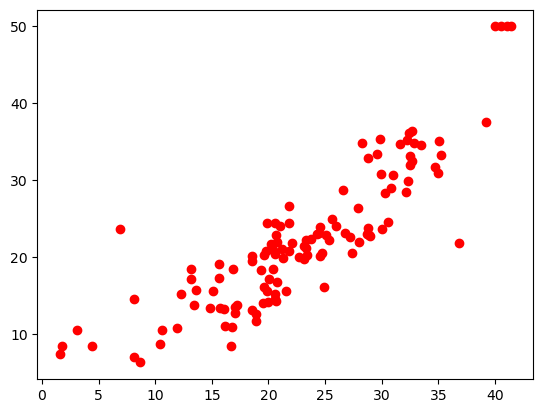

In [131]:
plt.scatter(Ypred, Ytest, color='red')

# By implement Ordinary Least Square, the same coefficients and interccept as Linear regression are achieved¶

In [126]:
Xnew=sm.add_constant(Xtrain_standard)
ols_model=sm.OLS(Ytrain,Xnew)
ols_result=ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     61.61
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           9.58e-67
Time:                        00:30:03   Log-Likelihood:                -858.92
No. Observations:                 279   AIC:                             1742.
Df Residuals:                     267   BIC:                             1785.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9047      0.322     71.189      0.0

In [132]:
# Get intercept from results
const = ols_result.params[0]

# Get coefficients (excluding intercept)
coefficients = ols_result.params[1:]

# Initialize final function string with intercept
final_function = f"Y = {const:.2f}"

# Add terms for each coefficient and corresponding feature
for i, coefficient in enumerate(coefficients):
    final_function += f" + {coefficient:.2f} * X_{i+1}"

# Print the final function
print("Final Function:")
print(final_function)

Final Function:
Y = 22.90 + 2.25 * X_1 + 0.88 * X_2 + -2.75 * X_3 + 3.38 * X_4 + -2.33 * X_5 + -5.48 * X_6 + -1.54 * X_7 + -1.76 * X_8 + -2.31 * X_9 + 0.81 * X_10 + 0.41 * X_11


# implement RandomForest

In [240]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor with default parameters
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_regressor.fit(Xtrain_standard, Ytrain)

# Make predictions on the testing data
y_pred = rf_regressor.predict(Xtest_standard)

# Calculate R^2 score
r2 = r2_score(Ytest, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(Ytest, y_pred)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)
y_pred



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R^2 Score: 0.849686830663793
Mean Squared Error: 12.51985433333334


array([16.836, 35.706, 24.087, 14.057, 23.257, 23.639, 19.835, 19.945,
       15.887, 33.415, 19.096, 24.611, 24.848, 26.037, 33.169, 23.791,
       15.069, 21.311, 24.884, 20.087, 34.385, 26.219, 34.109, 27.093,
       16.812, 45.002, 23.184, 10.928, 14.281, 17.429, 21.599, 19.579,
       17.329, 22.316, 11.512, 20.776, 32.59 , 20.291, 16.142, 20.346,
       22.753, 22.685, 18.325, 31.774, 19.947, 13.244, 10.916, 21.284,
       23.787, 18.773, 23.822, 35.311, 21.815, 10.7  , 14.67 , 19.925,
       20.035, 21.184, 20.834, 34.761, 47.833, 23.767, 19.505, 20.987,
       16.148, 19.168, 19.137, 17.743, 33.63 ,  8.041, 20.336, 24.018,
       18.524, 12.733, 16.475, 21.991, 15.923, 30.553, 33.646, 14.458,
       19.823, 18.934,  8.378, 22.301, 20.705, 22.768, 16.286,  8.281,
       16.322, 25.056, 21.312, 11.316, 12.844, 14.687, 14.553, 36.242,
        8.59 , 28.481, 23.703, 36.865, 21.283, 29.612, 32.69 , 43.491,
       22.852, 18.054, 13.127, 14.485, 18.889, 27.597, 49.145, 45.498,
      

# By implement K-Fold in LinearRegression for cross validation the results of r2_score and mean_squared_error which are the metrics of evaluating the model have better results

In [141]:
# Define the number of folds for cross-validation
n_folds = 6

# Create a Linear Regression model
model = LinearRegression()

# Perform k-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, Y, scoring='r2', cv=kf)

# Print the cross-validation scores for R-squared
print("Cross-validation R-squared scores:", cv_scores)

# Calculate and print the mean R-squared score
mean_cv_score = np.mean(cv_scores)
print("Mean R-squared score:", mean_cv_score)
print()

# Define a custom scoring function for Mean Squared Error (MSE)
def custom_mse_scoring_function(estimator, X, Y):
    y_pred = estimator.predict(X)
    mse = mean_squared_error(Y, y_pred)
    return -mse  # Note: We negate MSE to match the convention of maximizing scores

# Perform k-fold cross-validation for MSE
cv_scores_mse = cross_val_score(model, X, Y, scoring=custom_mse_scoring_function, cv=kf)

# Print the cross-validation MSE scores
print("Cross-validation MSE scores:", cv_scores_mse)

# Calculate and print the mean MSE score
mean_cv_score_mse = np.mean(cv_scores_mse)
print("Mean MSE score:", mean_cv_score_mse)

# Calculate Bias^2
bias_squared = np.mean((y_pred_cv - np.mean(Y))**2)

# Calculate Variance
variance = np.var(y_pred_cv)

# Print Bias^2 and Variance
print("Bias^2:", bias_squared)
print("Variance:", variance)


Cross-validation R-squared scores: [0.75178037 0.55665508 0.75295693 0.85212307 0.67783226 0.71050876]
Mean R-squared score: 0.7169760790989584

Cross-validation MSE scores: [-21.52599747 -37.84941727 -15.08514208 -12.289626   -39.31625373
 -33.90666311]
Mean MSE score: -26.662183276194384
Bias^2: 69.0445750952745
Variance: 69.04454986103549


# compare 2linearregression model:Overall, the second Linear Regression model (with cross-validation) appears to be more reliable as it provides a more generalizable assessment of the model's performance. Despite the slightly lower R^2 score, it has a significantly lower mean squared error, indicating better prediction accuracy on unseen data. Additionally, the cross-validation approach helps in evaluating the model's performance across different subsets of the data, providing more robust insights into its generalization capabilities.

# By implement K-Fold in DecisionTreeRegressor for cross validation the results of r2_score and mean_squared_error which are the metrics of evaluating the model have better results

In [143]:
# Define the number of folds for cross-validation
n_folds = 6

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor()

# Perform k-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
cv_scores_r2 = cross_val_score(model, X, Y, scoring='r2', cv=kf)

# Print the cross-validation scores for R-squared
print("Cross-validation R-squared scores:", cv_scores_r2)

# Calculate and print the mean R-squared score
mean_cv_score_r2 = np.mean(cv_scores_r2)
print("Mean R-squared score:", mean_cv_score_r2)
print()

# Define a custom scoring function for Mean Squared Error (MSE)
def custom_mse_scoring_function(estimator, X, Y):
    y_pred = estimator.predict(X)
    mse = mean_squared_error(Y, y_pred)
    return mse

# Perform k-fold cross-validation for MSE
cv_scores_mse = cross_val_score(model, X, Y, scoring=custom_mse_scoring_function, cv=kf)

# Print the cross-validation MSE scores
print("Cross-validation MSE scores:", cv_scores_mse)

# Calculate and print the mean MSE score
mean_cv_score_mse = np.mean(cv_scores_mse)
print("Mean MSE score:", mean_cv_score_mse)

# Calculate Bias^2
bias_squared = np.mean((y_pred_cv - np.mean(Y))**2)

# Calculate Variance
variance = np.var(y_pred_cv)

# Print Bias^2 and Variance
print("Bias^2:", bias_squared)
print("Variance:", variance)


Cross-validation R-squared scores: [0.53686576 0.7451936  0.78339892 0.84991075 0.1365146  0.9234268 ]
Mean R-squared score: 0.6625517404298152

Cross-validation MSE scores: [ 44.27402985  16.73179104  16.42746269  14.16318182 107.01257576
   8.57545455]
Mean MSE score: 34.53074928388361
Bias^2: 69.0445750952745
Variance: 69.04454986103549


# based on the mse this model can perform better on unseen dataset because of  MSE in comparison with linearregression

# By implementing Kfold cross validarion, Having both bias and variance at similar levels can indicate that the model suffers from both underfitting and overfitting simultaneously

# Implement  GridSearch for improving HyperParameters

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {"max_depth": [5, 10, 15]}
gs = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring='neg_mean_squared_error', cv=6)
gs.fit(Xtrain_standard, Ytrain)


GridSearchCV(cv=6, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15]},
             scoring='neg_mean_squared_error')

In [144]:
from sklearn.metrics import r2_score, mean_squared_error

# Get the best estimator from the grid search
best_estimator = gs.best_estimator_

# Use the best estimator to make predictions
Y_pred = best_estimator.predict(Xtest_standard)

# Calculate the R^2 score
r2 = r2_score(Ytest, Y_pred)

# Calculate the mean squared error
mse = mean_squared_error(Ytest, Y_pred)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

# Calculate Bias^2
bias_squared = np.mean((Y_pred - np.mean(Ytest))**2)

# Calculate Variance
variance = np.var(Y_pred)

# Print Bias^2 and Variance
print("Bias^2:", bias_squared)
print("Variance:", variance)


R^2 Score: 0.7282332526917827
Mean Squared Error: 22.63594137471966
Bias^2: 79.70318921264695
Variance: 79.6733945421283


# Apply polyonomial transformation

# Degree2

In [149]:
from sklearn.preprocessing import PolynomialFeatures

# Degree 2 polynomial features
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly2 = poly.fit_transform(Xtrain_standard)
X_test_poly2 = poly.transform(Xtest_standard)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train_poly2, Ytrain)

# Make predictions
Y_pred_poly2 = model.predict(X_test_poly2)

# Calculate R^2 score
r2_score_poly2 = r2_score(Ytest, Y_pred_poly2)

# Calculate Mean Squared Error
mse_poly2 = mean_squared_error(Ytest, Y_pred_poly2)

#print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("R^2 Score:", r2_score_poly2)
print("Mean Squared Error:", mse_poly2)


y_train_pred2 = model.predict(X_train_poly2)
y_test_pred2 = model.predict(X_test_poly2)

# Compute bias and variance
bias = np.mean((Ytrain - np.mean(y_train_pred2)) ** 2)
variance = np.mean(np.var(y_train_pred2))



print("Bias2:", bias)
print("Variance2:", variance)


Model Intercept: [21.04930251]
R^2 Score: -0.7924761391402595
Mean Squared Error: 149.29856284126757
Bias2: 97.79177040377179
Variance2: 90.99546396891893


# Negative R-squared value indicates that the model is not useful for explaining or predicting the variability in the dependent variable, and it suggests that a different model or approach should be considered.
the model's performance is poor, and it is unable to explain any of the variance in the target variable. Overall, these results suggest that the model may suffer from overfitting or underfitting and requires further investigation and possibly revision to improve its performance.

# Implement Ridge for improving Bias and Variance

In [150]:
from sklearn.linear_model import Ridge

# Degree 2 polynomial features


# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the Ridge regression model
ridge_model.fit(X_train_poly2, Ytrain)

# Make predictions
Y_pred_ridge = ridge_model.predict(X_test_poly2)

# Calculate R^2 score
r2_score_ridge = r2_score(Ytest, Y_pred_ridge)

# Calculate Mean Squared Error
mse_ridge = mean_squared_error(Ytest, Y_pred_ridge)




#print("Ridge Coefficients:", ridge_model.coef_)
print("Ridge Intercept:", ridge_model.intercept_)
print("R^2 Score (Ridge):", r2_score_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)

from sklearn.model_selection import cross_val_score

# Use cross-validation to calculate R^2 scores
r2_scores_ridge = cross_val_score(ridge_model, X_train_poly2, Ytrain, cv=5)

# Calculate bias and variance
bias_ridge = np.mean((Ytrain - np.mean(Y_pred_ridge)) ** 2)
variance_ridge = np.mean(np.var(Y_pred_ridge))

print("Bias (Ridge):", bias_ridge)
print("Variance (Ridge):", variance_ridge)


Ridge Intercept: [22.30353709]
R^2 Score (Ridge): 0.8285633782019695
Mean Squared Error (Ridge): 14.27926469642399
Bias (Ridge): 97.85079132276421
Variance (Ridge): 80.83030042266155


# The Ridge regression model outperforms the polynomial regression model in terms of r score and MSE, indicating better predictive performance and lower error.
The Ridge regression model has a slightly higher intercept, suggesting a slight shift in the prediction bias.
The Ridge regression model exhibits lower variance, indicating more stable predictions across different subsets of the training data.
In summary, the results suggest that the Ridge regression model provides a better fit to the data and improves predictive performance compared to the polynomial regression model. The regularization introduced by Ridge regression helps to mitigate overfitting and improve the model's generalization ability.

# Implement Lasso for improving Bias and Variance but Ridge model works better

In [146]:
from sklearn.linear_model import Lasso

# Initialize Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the Lasso regression model
lasso_model.fit(X_train_poly2, Ytrain)

# Make predictions
Y_pred_lasso = lasso_model.predict(X_test_poly2)

# Calculate R^2 score
r2_score_lasso = r2_score(Ytest, Y_pred_lasso)

# Calculate Mean Squared Error
mse_lasso = mean_squared_error(Ytest, Y_pred_lasso)

#print("Lasso Coefficients:", lasso_model.coef_)
print("Lasso Intercept:", lasso_model.intercept_)
print("R^2 Score (Lasso):", r2_score_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)

# Use cross-validation to calculate R^2 scores
r2_scores_lasso = cross_val_score(lasso_model, X_train_poly2, Ytrain, cv=5)

# Calculate bias and variance
bias_lasso = np.mean((Ytrain - np.mean(Y_pred_lasso)) ** 2)
variance_lasso = np.mean(np.var(Y_pred_lasso))

print("Bias (Lasso):", bias_lasso)
print("Variance (Lasso):", variance_lasso)


Lasso Intercept: [21.86151442]
R^2 Score (Lasso): 0.793065224413771
Mean Squared Error (Lasso): 17.235969797468368
Bias (Lasso): 97.79178064655373
Variance (Lasso): 60.15469245285103


# Ridge regression has a slightly higher R2_score and lower mean squared error compared to Lasso regression, indicating that Ridge regression might be performing slightly better in terms of predictive accuracy.

Bias and Variance Tradeoff: Ridge regression has higher bias but lower variance compared to Lasso regression. This suggests that Ridge regression may provide more stable predictions across different datasets, while Lasso regression might be more sensitive to variations in the data.

# Degree3

In [145]:
#degree 3
poly=PolynomialFeatures(degree=3, include_bias=True)
X_train_poly3=poly.fit_transform(Xtrain_standard)
X_test_poly3=poly.fit_transform(Xtest_standard)
model=LinearRegression()
model.fit(X_train_poly3, Ytrain)
Ypred_poly3=model.predict(X_test_poly3)
r2_score_poly3=r2_score(Ytest,Ypred_poly3)
mse_poly3=mean_squared_error(Ytest, Ypred_poly3)

#print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("r2_score:", r2_score_poly3)
print("mse:", mse_poly3)


y_train_pred3 = model.predict(X_train_poly3)
y_test_pred3 = model.predict(X_test_poly3)

# Compute bias and variance
bias = np.mean((Ytrain - np.mean(y_train_pred3)) ** 2)
variance = np.mean(np.var(y_train_pred3))



print("Bias2:", bias)
print("Variance2:", variance)

Model Intercept: [-280.94587373]
r2_score: -2184.908690358664
mse: 182068.26793762363
Bias2: 97.79177040377178
Variance2: 97.79177040375357


# the model's performance is poor, and it is unable to explain any of the variance in the target variable. Overall, these results suggest that the model may suffer from overfitting or underfitting and requires further investigation and possibly revision to improve its performance.

# Implement Ridge for improving Bias and Variance

In [151]:
# Degree 3 polynomial features
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly3 = poly.fit_transform(Xtrain_standard)
X_test_poly3 = poly.transform(Xtest_standard)

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the Ridge regression model
ridge_model.fit(X_train_poly3, Ytrain)

# Make predictions
Y_pred_ridge = ridge_model.predict(X_test_poly3)

# Calculate R^2 score
r2_score_poly3 = r2_score(Ytest, Y_pred_ridge)

# Calculate Mean Squared Error
mse_poly3 = mean_squared_error(Ytest, Y_pred_ridge)

#print("Ridge Coefficients:", ridge_model.coef_)
print("Ridge Intercept:", ridge_model.intercept_)
print("R^2 Score (Ridge):", r2_score_poly3)
print("Mean Squared Error (Ridge):", mse_poly3)

# Use cross-validation to calculate R^2 scores
r2_scores_ridge = cross_val_score(ridge_model, X_train_poly3, Ytrain, cv=5)

# Calculate bias and variance
bias_ridge = np.mean((Ytrain - np.mean(Y_pred_ridge)) ** 2)
variance_ridge = np.mean(np.var(Y_pred_ridge))

print("Bias (Ridge):", bias_ridge)
print("Variance (Ridge):", variance_ridge)


Ridge Intercept: [21.06637908]
R^2 Score (Ridge): 0.5139706317325587
Mean Squared Error (Ridge): 40.482260598337675
Bias (Ridge): 98.08438335896695
Variance (Ridge): 107.5816109538986


# the results suggest that the Ridge regression model significantly improves upon the performance of the polynomial regression model and provides more reliable predictions. The regularization introduced by Ridge regression helps to mitigate overfitting and improve the model's generalization ability.

# Degree4

In [152]:
#degree 4
poly=PolynomialFeatures(degree=4, include_bias=True)
X_train_poly4=poly.fit_transform(Xtrain_standard)
X_test_poly4=poly.fit_transform(Xtest_standard)
model=LinearRegression()
model.fit(X_train_poly4, Ytrain)
Ypred_poly4=model.predict(X_test_poly4)
r2_score_poly4=r2_score(Ytest,Ypred_poly4)
mse_poly4=mean_squared_error(Ytest, Ypred_poly4)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("r2_score:", r2_score_poly4)
print("mse:", mse_poly4)

y_train_pred4 = model.predict(X_train_poly4)
y_test_pred4 = model.predict(X_test_poly4)

# Compute bias and variance
bias = np.mean((Ytrain - np.mean(y_train_pred4)) ** 2)
variance = np.mean(np.var(y_train_pred4))



print("Bias2:", bias)
print("Variance2:", variance)

Model Coefficients: [[-9.40886258e-13  2.15572280e+00 -3.71735225e+00 ... -5.69394034e-01
   7.17360152e-01  6.12890449e-01]]
Model Intercept: [17.8370377]
r2_score: -49.339806510390645
mse: 4192.893060943957
Bias2: 97.79177040377179
Variance2: 97.79177040377286


# Implement Ridge for improving Bias and Variance

In [154]:
# Degree 4 polynomial features
poly = PolynomialFeatures(degree=4, include_bias=True)
X_train_poly4 = poly.fit_transform(Xtrain_standard)
X_test_poly4 = poly.transform(Xtest_standard)

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the Ridge regression model
ridge_model.fit(X_train_poly4, Ytrain)

# Make predictions
Y_pred_ridge4 = ridge_model.predict(X_test_poly4)

# Calculate R^2 score
r2_score_poly4 = r2_score(Ytest, Y_pred_ridge4)

# Calculate Mean Squared Error
mse_poly4 = mean_squared_error(Ytest, Y_pred_ridge4)       #the differences between observed and predicted values of data.

#print("Ridge Coefficients:", ridge_model.coef_)
print("Ridge Intercept:", ridge_model.intercept_)
print("R^2 Score (Ridge):", r2_score_poly4)
print("Mean Squared Error (Ridge):", mse_poly4)

# Use cross-validation to calculate R^2 scores
r2_scores_ridge = cross_val_score(ridge_model, X_train_poly4, Ytrain, cv=5)

# Calculate bias and variance
bias_ridge = np.mean((Ytrain - np.mean(Y_pred_ridge4)) ** 2)
variance_ridge = np.mean(np.var(Y_pred_ridge4))

print("Bias (Ridge):", bias_ridge)
print("Variance (Ridge):", variance_ridge)


Ridge Intercept: [21.97484156]
R^2 Score (Ridge): -1.1439543911946326
Mean Squared Error (Ridge): 178.5738188716479
Bias (Ridge): 102.57908891654331
Variance (Ridge): 218.36325622584457


# In summary, the stability analysis suggests that the polynomial regression model with degree 4 exhibits the highest stability in terms of the inferred beta coefficients, followed by the cubic model (degree 3). The quadratic model (degree 2) shows the lowest stability among the three models. However, it's essential to consider other factors such as model performance and complexity when selecting the optimal polynomial degree for the regression model.

In [158]:
from sklearn.utils import resample

#Define polynomial degrees
polynomial_degrees = [2, 3, 4]

# Create a list to store the stability of each model
stability_scores = []

for degree in polynomial_degrees:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(Xtrain_standard)
    
    # Perform bootstrap resampling and fit the model on each sample
    beta_coefficients = []
    n_bootstrap = 100  # Number of bootstrap samples
    for _ in range(n_bootstrap):
        X_sample, y_sample = resample(X_poly_train, Ytrain)
        model = LinearRegression()
        model.fit(X_sample, y_sample)
        beta_coefficients.append(model.coef_)
    
    # Calculate the standard deviation of beta coefficients across bootstrap samples
    beta_coefficients_std = np.std(beta_coefficients, axis=0)
    
    # Calculate stability score (average standard deviation of beta coefficients)
    stability_score = np.mean(beta_coefficients_std)
    
    # Store the stability score for this model
    stability_scores.append((degree, stability_score))

# Print stability scores for each model
print("Stability Scores:")
for degree, stability_score in stability_scores:
    print(f"Polynomial Degree {degree}: {stability_score}")
    
print("beta_coefficients_std:")
for beta_coefficients_std in beta_coefficients_std:
    print(f"Polynomial Degree {degree}: {beta_coefficients_std}")    

Stability Scores:
Polynomial Degree 2: 554477865463.8993
Polynomial Degree 3: 4.165486142921723
Polynomial Degree 4: 0.3604346761734805
beta_coefficients_std:
Polynomial Degree 4: [0.0044975  0.6014559  0.6990331  ... 0.13289362 0.20522653 0.2258537 ]


# In summary, both models perform poorly on this dataset, and the Ridge regression model does not provide significant improvement over the polynomial regression model. It's possible that neither model is suitable for accurately predicting the target variable in this case. Further analysis and potentially different modeling approaches may be necessary to improve predictive performance.

# Consider polynomial 2,3 and 4 with each other:

In [170]:


# Define polynomial degrees
degrees = [2, 3, 4]

for degree in degrees:
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(Xtrain_standard)
    X_test_poly = poly.transform(Xtest_standard)
    
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X_train_poly, Ytrain)
    
    # Make predictions
    Y_pred_train = model.predict(X_train_poly)
    Y_pred_test = model.predict(X_test_poly)
    
    # Calculate R-squared
    r2_train = r2_score(Ytrain, Y_pred_train)
    r2_test = r2_score(Ytest, Y_pred_test)
    
    # Calculate Mean Squared Error
    mse_train = mean_squared_error(Ytrain, Y_pred_train)
    mse_test = mean_squared_error(Ytest, Y_pred_test)
    
    # Calculate bias
    bias = np.mean((Y_pred_train - np.mean(Y_pred_train)) ** 2)
    
    # Calculate variance
    variance = np.mean(np.var(Y_pred_train))
    
    print(f"Polynomial Degree: {degree}")
    print(f"R-squared (Train): {r2_train:.4f}, R-squared (Test): {r2_test:.4f}")
    print(f"MSE (Train): {mse_train:.4f}, MSE (Test): {mse_test:.4f}")
    print(f"Bias: {bias:.4f}")
    print(f"Variance: {variance:.4f}")
    print()


Polynomial Degree: 2
R-squared (Train): 0.9305, R-squared (Test): -0.7925
MSE (Train): 6.7963, MSE (Test): 149.2986
Bias: 90.9955
Variance: 90.9955

Polynomial Degree: 3
R-squared (Train): 1.0000, R-squared (Test): -2184.9087
MSE (Train): 0.0000, MSE (Test): 182068.2679
Bias: 97.7918
Variance: 97.7918

Polynomial Degree: 4
R-squared (Train): 1.0000, R-squared (Test): -49.3398
MSE (Train): 0.0000, MSE (Test): 4192.8931
Bias: 97.7918
Variance: 97.7918



# R-squared value on the testing set is negative, indicating poor generalization.

# load a new dataset for prediction

In [198]:
dfnew=pd.read_csv(r"C:\Users\Kyle\Desktop\Middlesex uni\Machine Learning\Week8\house_unseen.csv")
dfnew

,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail
0,6.438,8.9,7.3967,7,330,3.59,0.21409,0.431,19.1,22.0,5.86
1,7.875,32.0,5.6484,4,255,2.97,0.01381,0.422,14.4,80.0,0.46
2,6.404,100.0,1.6390,24,666,20.31,9.59571,0.693,20.2,0.0,18.10
3,6.417,66.1,3.0923,2,270,8.81,0.04684,0.489,17.8,0.0,3.41
4,6.290,17.8,6.6115,4,337,4.67,0.03584,0.398,16.1,80.0,3.37
5,7.163,79.9,3.2157,8,307,6.36,0.41238,0.504,17.4,0.0,6.20
6,5.594,36.8,6.4980,4,345,13.09,0.13554,0.409,18.9,12.5,6.07
7,5.875,94.6,2.4259,5,403,14.43,1.20742,0.605,14.7,0.0,19.58
8,6.426,52.3,4.5404,5,287,7.20,0.16760,0.493,19.6,0.0,7.38
9,6.009,42.3,5.5027,4,289,10.40,0.08199,0.437,16.0,0.0,13.92


In [199]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rooms                  10 non-null     float64
 1   Age                    10 non-null     float64
 2   Distance               10 non-null     float64
 3   Accessibility          10 non-null     int64  
 4   Tax                    10 non-null     int64  
 5   DisadvantagedPosition  10 non-null     float64
 6   Crime                  10 non-null     float64
 7   NitricOxides           10 non-null     float64
 8   PupilTeacher           10 non-null     float64
 9   Residential            10 non-null     float64
 10  NonRetail              10 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 1012.0 bytes


In [81]:
X_new_=dfnew
X_new_

,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail
0,6.438,8.9,7.3967,7,330,3.59,0.21409,0.431,19.1,22.0,5.86
1,7.875,32.0,5.6484,4,255,2.97,0.01381,0.422,14.4,80.0,0.46
2,6.404,100.0,1.6390,24,666,20.31,9.59571,0.693,20.2,0.0,18.10
3,6.417,66.1,3.0923,2,270,8.81,0.04684,0.489,17.8,0.0,3.41
4,6.290,17.8,6.6115,4,337,4.67,0.03584,0.398,16.1,80.0,3.37
5,7.163,79.9,3.2157,8,307,6.36,0.41238,0.504,17.4,0.0,6.20
6,5.594,36.8,6.4980,4,345,13.09,0.13554,0.409,18.9,12.5,6.07
7,5.875,94.6,2.4259,5,403,14.43,1.20742,0.605,14.7,0.0,19.58
8,6.426,52.3,4.5404,5,287,7.20,0.16760,0.493,19.6,0.0,7.38
9,6.009,42.3,5.5027,4,289,10.40,0.08199,0.437,16.0,0.0,13.92


In [87]:
X_new_standard=scaler.fit(X_new_)
X_new_standard

StandardScaler()

In [201]:
scaler=StandardScaler()
X_new_standard=scaler.fit_transform(X_new_)
X_new_standard

array([[-0.01794446, -1.48584993,  1.46358924,  0.05013247, -0.16691652,
        -1.07562106, -0.34625514, -0.63624221,  0.86277594,  0.08205669,
        -0.41742036],
       [ 2.30513603, -0.70878103,  0.52960044, -0.45119222, -0.82928368,
        -1.19485672, -0.41723334, -0.73652557, -1.55094246,  1.9484442 ,
        -1.29278732],
       [-0.07290949,  1.57869452, -1.61232867,  2.89097238,  2.80048833,
         2.1398955 ,  2.97854294,  2.28311784,  1.42768875, -0.6258834 ,
         1.56674475],
       [-0.05189345,  0.43832068, -0.8359368 , -0.78540868, -0.69681025,
        -0.07173371, -0.40552768,  0.01002834,  0.1951517 , -0.6258834 ,
        -0.81457759],
       [-0.25720397, -1.18645974,  1.04411432, -0.45119222, -0.10509559,
        -0.86792023, -0.40942602, -1.00394786, -0.67789538,  1.9484442 ,
        -0.82106179],
       [ 1.1541038 ,  0.90254366, -0.77001321,  0.2172407 , -0.37004245,
        -0.54290689, -0.27598218,  0.17716727, -0.01027114, -0.6258834 ,
        -0.362

In [204]:
X_new_standard.shape

(10, 11)

In [241]:
# Initialize the Random Forest Regressor with default parameters
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_regressor.fit(Xtrain_standard, Ytrain)

# Make predictions on the testing data
y_pred = rf_regressor.predict(Xtest_standard)

# Calculate R^2 score
r2 = r2_score(Ytest, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(Ytest, y_pred)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)
y_predunseen = rf_regressor.predict(X_new_standard)

y_predunseen

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R^2 Score: 0.849686830663793
Mean Squared Error: 12.51985433333334


array([26.063, 45.959,  7.585, 20.025, 22.97 , 31.916, 18.353, 14.887,
       22.84 , 20.584])

In [224]:
y_predunseen_df = pd.DataFrame({'Predicted_Price': y_predunseen})
y_predunseen_df

,Predicted_Price
0,26.063
1,45.959
2,7.585
3,20.025
4,22.970
5,31.916
6,18.353
7,14.887
8,22.840
9,20.584


# Generate price predictions for the houses within the dataset located in the
house_data.zip

In [237]:
pd.concat([dfnew, y_predunseen_df], axis=1)

,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail,Predicted_Price
0,6.438,8.9,7.3967,7,330,3.59,0.21409,0.431,19.1,22.0,5.86,26.063
1,7.875,32.0,5.6484,4,255,2.97,0.01381,0.422,14.4,80.0,0.46,45.959
2,6.404,100.0,1.6390,24,666,20.31,9.59571,0.693,20.2,0.0,18.10,7.585
3,6.417,66.1,3.0923,2,270,8.81,0.04684,0.489,17.8,0.0,3.41,20.025
4,6.290,17.8,6.6115,4,337,4.67,0.03584,0.398,16.1,80.0,3.37,22.970
5,7.163,79.9,3.2157,8,307,6.36,0.41238,0.504,17.4,0.0,6.20,31.916
6,5.594,36.8,6.4980,4,345,13.09,0.13554,0.409,18.9,12.5,6.07,18.353
7,5.875,94.6,2.4259,5,403,14.43,1.20742,0.605,14.7,0.0,19.58,14.887
8,6.426,52.3,4.5404,5,287,7.20,0.16760,0.493,19.6,0.0,7.38,22.840
9,6.009,42.3,5.5027,4,289,10.40,0.08199,0.437,16.0,0.0,13.92,20.584
